In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from ast import literal_eval
from collections import defaultdict
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [3]:
tr = pd.read_csv('D:/finData.csv')

In [4]:
tr.head()

,Unnamed: 0,Product_Seller,Price,Rate
0,0,Acer Aspire 3 UN.GNVSI.001 15.6-inch Laptop (A...,18489.00,0
1,1,Acer Aspire 3 UN.GNVSI.001 15.6-inch Laptop (A...,18489.00,3
2,2,Acer Aspire 3 UN.GNVSI.001 15.6-inch Laptop (A...,18489.00,5
3,3,Acer Aspire 3 UN.GNVSI.001 15.6-inch Laptop (A...,18489.00,1
4,4,Acer Aspire 3 UN.GNVSI.001 15.6-inch Laptop (A...,18489.00,1


In [5]:
tr = tr[['Product_Seller', 'Price', 'Rate']]

In [6]:
tr.head()

,Product_Seller,Price,Rate
0,Acer Aspire 3 UN.GNVSI.001 15.6-inch Laptop (A...,18489.00,0
1,Acer Aspire 3 UN.GNVSI.001 15.6-inch Laptop (A...,18489.00,3
2,Acer Aspire 3 UN.GNVSI.001 15.6-inch Laptop (A...,18489.00,5
3,Acer Aspire 3 UN.GNVSI.001 15.6-inch Laptop (A...,18489.00,1
4,Acer Aspire 3 UN.GNVSI.001 15.6-inch Laptop (A...,18489.00,1


In [7]:
tab1 = pd.read_csv('D:/FinishedDataSet_1.csv')
tab2 = pd.read_csv('D:/FinishedDataSet_2.csv')
tab3 = tr


tab1 = tab1[['Product_Seller', 'Price', 'Rating']]
tab2 = tab2[['Product_Seller', 'Price', 'Rating']]

tab1['Product'], tab1['Seller'] = tab1['Product_Seller'].str.split(' ##### ', 1).str
tab1 = tab1[['Product', 'Seller','Price', 'Rating']]


tab2['Product'], tab2['Seller'] = tab2['Product_Seller'].str.split(' ##### ', 1).str
tab2 = tab2[['Product', 'Seller','Price', 'Rating']]

In [8]:
tab3 = tab3.rename(columns={'Rate':'Rating'})
tab3['Product'], tab3['Seller'] = tab3['Product_Seller'].str.split(' - ', 1).str
tab3 = tab3[['Product', 'Seller','Price', 'Rating']]

In [9]:
finData = pd.concat([tab1,tab2,tab3]).reset_index(drop=True)

In [10]:
finData.head()

,Product,Seller,Price,Rating
0,Lenovo Ideapad 330 Intel Core i5 8th Gen 15.6-...,Sonal-enterprises,35000,2.5
1,HP Pavilion x360 Intel Core i3 8th Gen 14-inch...,it store,47490,5
2,Lenovo Ideapad 330s Intel Core i3 8th Gen 14-i...,FastDealsIndia,33065,5
3,Dell Inspiron 5370 Intel Core i5 8th Gen 13.3-...,estore9,62489,4
4,HP 15 Core i3 7th gen 15.6-inch Laptop (4GB/1T...,NEWYEARDEAL,31990,5


In [11]:
finData.describe()

finData = pd.read_csv('D:/erp.csv')
finData['Rating'] = finData['Rating'].astype(float)

finData['Price'] = finData['Price'].astype(float)



In [12]:
finData = finData[['Product','Seller', 'Price', 'Rating']]

In [13]:
finData.head()
finData['Rating'].fillna(value=2.5)
finData.to_csv('D:/Data.csv')


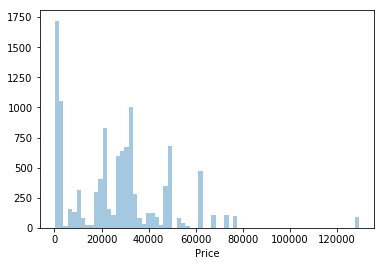

In [14]:
sns.distplot(finData['Price'],kde=False,bins=70)

C:\Users\Rahlsesite\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


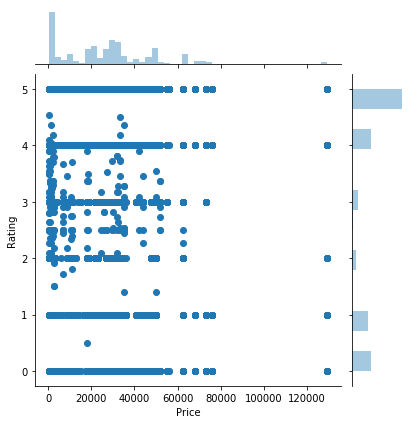

In [15]:
sns.jointplot(x='Price',y='Rating',data=finData)

C:\Users\Rahlsesite\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Rahlsesite\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


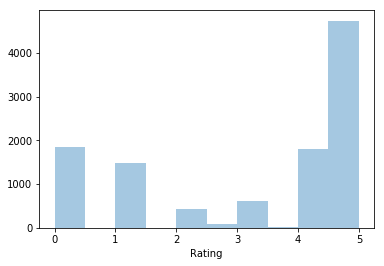

In [16]:
sns.distplot(finData['Rating'],kde=False,bins=10)

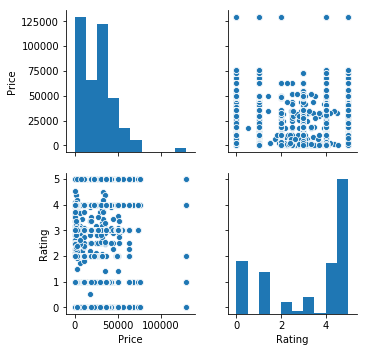

In [17]:
sns.pairplot(finData)

In [18]:
ratings = finData.pivot_table(index='Product',columns='Seller',values='Rating')
price = finData.pivot_table(index='Product',columns='Seller',values='Price')

In [19]:
X_train = finData[['Product', 'Price', 'Rating']]

In [20]:
Y_train = finData['Seller']
E = 'Acer Aspire 3 UN.GNVSI.001 15.6-inch Laptop (AMD Dual-Core Processor E2-9000/4GB/1TB/windows 10 Home 64Bit/Integrated Graphics), Obsidian Black'

In [21]:
#LET's ASSUME THAT THE GIVEN PRODUCT IS SEARCHED & CLICKED UPON
Product = 'YI Dome Camera 1080p HD Pan/Tilt/Zoom Wireless IP Security Surveillance System Night Vision (US Edition)'

#LOCATING THE DATA WITH SEARCHED PRODUCT
df = finData.loc[finData['Product'] == Product]

In [22]:
#FILTERING ONLY SELLER, PRICE & RATING
df = df[['Seller', 'Price', 'Rating']]

#SINCE THERE ARE MULTIPLE RATINGS ON A PARTICULAR SELLER FOR A PARTICULAR PRODUCT
#NUMBER OF RATINGS RECEIVED BY EACH SELLER ON THE PRODUCT
avg_rating_count = pd.DataFrame(df.groupby('Seller')['Rating'].count().sort_values(ascending=False)).reset_index()
avg_rating_count

,Seller,Rating
0,SmartGlobal,12
1,Shop Your World Store,12
2,Peach Imports,12
3,NyCraze,12
4,Kiron,12
5,HelloYehlo,12
6,Headrush India,12
7,Exborders,12
8,Everfocus AV,12
9,Appario Retail Private Ltd,12


In [23]:
#AVERAGE RATING RECEIVED BY EACH SELLER ON THE PRODUCT
avg_rating = pd.DataFrame(df.groupby('Seller')['Rating'].mean().sort_values(ascending=False)).reset_index()
avg_rating

,Seller,Rating
0,HelloYehlo,3.909091
1,Everfocus AV,3.800000
2,Kiron,3.416667
3,Headrush India,3.083333
4,Appario Retail Private Ltd,3.000000
5,Peach Imports,2.833333
6,SmartGlobal,2.750000
7,NyCraze,2.583333
8,Shop Your World Store,2.166667
9,Exborders,1.727273


In [24]:
#AVERAGE OF PRICE PROVIDED BY EACH SELLER ON THE PRODUCT
avg_price = pd.DataFrame(df.groupby('Seller')['Price'].mean().sort_values()).reset_index()
avg_price

,Seller,Price
0,Headrush India,2544.500000
1,Kiron,2604.250000
2,Appario Retail Private Ltd,2613.666667
3,SmartGlobal,2653.750000
4,Peach Imports,2676.833333
5,Everfocus AV,2711.333333
6,Exborders,3016.333333
7,HelloYehlo,3125.000000
8,NyCraze,3148.333333
9,Shop Your World Store,3406.666667


In [25]:
#CREATING A NEW FRAME BASED ON SELLERS
new_Frame = pd.merge(avg_rating,avg_price,on='Seller', how='outer')
new_Frame = pd.merge(new_Frame,avg_rating_count,on='Seller', how='outer')
new_Frame = new_Frame.rename(columns={'Rating_y':'Count','Rating_x':'Rating'})
new_Frame


,Seller,Rating,Price,Count
0,HelloYehlo,3.909091,3125.000000,12
1,Everfocus AV,3.800000,2711.333333,12
2,Kiron,3.416667,2604.250000,12
3,Headrush India,3.083333,2544.500000,12
4,Appario Retail Private Ltd,3.000000,2613.666667,12
5,Peach Imports,2.833333,2676.833333,12
6,SmartGlobal,2.750000,2653.750000,12
7,NyCraze,2.583333,3148.333333,12
8,Shop Your World Store,2.166667,3406.666667,12
9,Exborders,1.727273,3016.333333,12


In [26]:
corr = new_Frame.corr()
corr

,Rating,Price,Count
Rating,1.000000,-0.389156,NaN
Price,-0.389156,1.000000,NaN
Count,NaN,NaN,NaN


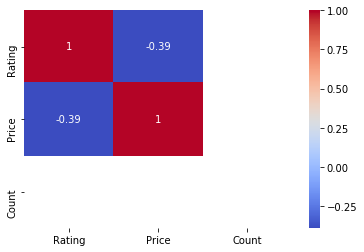

In [27]:
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [28]:
#SCALING DATA TO SCORE(0-5) 
from sklearn.preprocessing import MinMaxScaler
data = new_Frame[['Price','Rating','Count']]
scaler = MinMaxScaler(feature_range=(0, 5))
scaler.fit(data)


C:\Users\Rahlsesite\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 5))

In [29]:
df = pd.DataFrame()

In [30]:
df = pd.DataFrame(scaler.transform(data))

#LOWER THE PRICE HIGHER THE SCORE, HENCE REVERSE SCALING
df[0] = 5 - df[0]
df

,0,1,2
0,1.633482,5.000000,0.0
1,4.032476,4.750000,0.0
2,4.653489,3.871528,0.0
3,5.000000,3.107639,0.0
4,4.598879,2.916667,0.0
5,4.232554,2.534722,0.0
6,4.366422,2.343750,0.0
7,1.498164,1.961806,0.0
8,0.000000,1.006944,0.0
9,2.263677,0.000000,0.0


In [31]:
#CALCULATING TOTAL SCORE
df['result'] = df[0] + df[1] + df[2]

In [32]:
new_Frame = new_Frame.join(df['result'])

In [33]:
new_Frame

,Seller,Rating,Price,Count,result
0,HelloYehlo,3.909091,3125.000000,12,6.633482
1,Everfocus AV,3.800000,2711.333333,12,8.782476
2,Kiron,3.416667,2604.250000,12,8.525017
3,Headrush India,3.083333,2544.500000,12,8.107639
4,Appario Retail Private Ltd,3.000000,2613.666667,12,7.515545
5,Peach Imports,2.833333,2676.833333,12,6.767276
6,SmartGlobal,2.750000,2653.750000,12,6.710172
7,NyCraze,2.583333,3148.333333,12,3.459969
8,Shop Your World Store,2.166667,3406.666667,12,1.006944
9,Exborders,1.727273,3016.333333,12,2.263677


In [34]:
#RETURNING THE SELLER WITH HIGHEST SCORE
pdr = new_Frame[new_Frame['result'] == new_Frame['result'].max()]
x = pdr.iat[0,0]
x



'Everfocus AV'

In [35]:
#A FUNCTION WHICH TAKES PRODUCT NAME AND FINISHED DATASET TO RETURN A BEST SELLER FOR THE PRODUCT

def Best_Seller(product,dataSet):
    avg_rating_count = pd.DataFrame()
    avg_rating = pd.DataFrame()
    avg_price = pd.DataFrame()
    df = pd.DataFrame()         
    new_Frame = pd.DataFrame()
    
    df = dataSet.loc[dataSet['Product'] == product]
    df = df[['Seller', 'Price', 'Rating']]
        
    avg_rating_count = pd.DataFrame(df.groupby('Seller')['Rating'].count().reset_index())
    avg_rating = pd.DataFrame(df.groupby('Seller')['Rating'].mean().reset_index())
    avg_price = pd.DataFrame(df.groupby('Seller')['Price'].mean().reset_index())
    
    new_Frame = pd.merge(avg_rating,avg_price,on='Seller', how='outer')
    new_Frame = pd.merge(new_Frame,avg_rating_count,on='Seller', how='outer')
    new_Frame = new_Frame.rename(columns={'Rating_y':'Count','Rating_x':'Rating'})
      
    data = new_Frame[['Price','Rating','Count']]
    scaler = MinMaxScaler(feature_range=(0, 5))
    scaler.fit(data)

    df = pd.DataFrame()     
    df = pd.DataFrame(scaler.transform(data))
                             
    df[0] = 5 - df[0]
    df['result'] = df[0] + df[1] + df[2]
    pdr = pd.DataFrame()
    pdr = new_Frame[new_Frame['result'] == new_Frame['result'].max()]
    x = pdr.iat[0,0]
    return x.astype(str)

In [36]:
pdf = pd.DataFrame(finData.groupby(['Product'])['Seller'].count()).reset_index()

In [37]:
bestSeller = pdf[['Product']]

In [38]:
serieA = pd.Series(bestSeller['Product'])

In [39]:
x = serieA[0]

In [40]:
finData.to_csv('D:/Trap.csv')

In [41]:
df = pd.read_csv('D:/Trap.csv')

In [42]:
df = df[['Product', 'Seller', 'Price', 'Rating']]

In [97]:
pr = pd.read_csv('D:/amazon1.csv')
pe = pd.read_csv('D:/amazon2.csv')

In [98]:
pr.columns

Index(['web-scraper-order', 'web-scraper-start-url', 'Product', 'Product-href',
       'Main_Pagination', 'Main_Pagination-href', 'Brand', 'ProductDesc',
       'Sellers', 'Sellers-href', 'Seller_Price', 'Seller_Name',
       'Seller_Name-href', 'Ratings'],
      dtype='object')

In [99]:
pe.columns

Index(['web-scraper-order', 'web-scraper-start-url', 'Product', 'Product-href',
       'Pagination', 'Pagination-href', 'Brand', 'ProductDesc', 'Sellers',
       'Sellers-href', 'Price', 'Seller_Name', 'Seller_Name-href', 'Ratings'],
      dtype='object')

In [100]:
pr = pr[['Product','Brand','ProductDesc','Seller_Price','Seller_Name','Ratings']]

In [101]:
pr['Seller_Price'] = pr.groupby(['Product','Brand'], sort=False)['Seller_Price'].apply(lambda x: x.ffill().bfill())

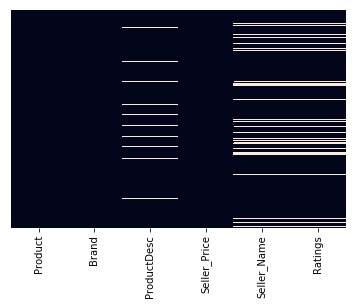

In [102]:
sns.heatmap(pr.isnull(),yticklabels=False,cbar=False)

In [103]:
pr = pr[pd.notnull(pr['Seller_Name'])]

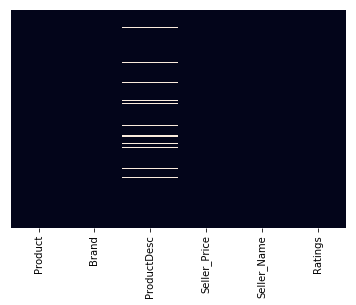

In [104]:
sns.heatmap(pr.isnull(),yticklabels=False,cbar=False)

In [105]:
pr = pr[pd.notnull(pr['ProductDesc'])]

In [106]:
pr.shape

(423, 6)

(404, 6)

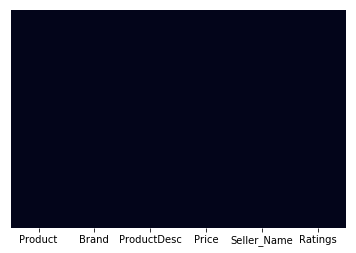

In [107]:
pe = pe[['Product','Brand', 'ProductDesc','Price', 'Seller_Name','Ratings']]
pe['Price'] = pe.groupby(['Product','Brand'], sort=False)['Price'].apply(lambda x: x.ffill().bfill())
pe = pe[pd.notnull(pe['Seller_Name'])]
pe = pe[pd.notnull(pe['ProductDesc'])]
sns.heatmap(pe.isnull(),yticklabels=False,cbar=False)
pe.shape

In [108]:
pr = pr.rename(columns={'Seller_Price': 'Price', 'Seller_Name': 'Seller','ProductDesc':'Decription'})
pe = pe.rename(columns={'Seller_Name': 'Seller','ProductDesc':'Decription'})
pr.columns

Index(['Product', 'Brand', 'Decription', 'Price', 'Seller', 'Ratings'], dtype='object')

In [109]:
pe.columns

Index(['Product', 'Brand', 'Decription', 'Price', 'Seller', 'Ratings'], dtype='object')

In [110]:
finSet = pd.concat([pr,pe], axis=0)

In [111]:
finSet.shape

(827, 6)

In [112]:
finSet.head()

,Product,Brand,Decription,Price,Seller,Ratings
0,LG 80 cm (32 Inches) HD Ready LED Smart TV 32L...,LG,"ThinQ AI, Size (cm) 80cm (32), Active HDR, Mag...","Rs. 28,900.00",Galaxy Shopee,5 out of 5 stars
1,LG 139 cm (55 Inches) 4K UHD LED Smart TV 55UK...,LG,Size name:55 inches\n \n \...,"Rs. 74,999.00",Galaxy Shopee,5 out of 5 stars
2,Samsung 59 cm (24 Inches) HD Ready LED TV 24K4...,Samsung,59cm (24) HD Flat TV K4100 Series 4 (UA24K4100...,"Rs. 10,999.00",Cloudtail India,3 out of 5 stars
3,Kodak 140 cm (55 inches) UHD 55UHDXSMART 4K Ul...,Kodak,What is it like to have the Kodak Ultra HD LED...,"Rs. 36,990.00",Cloudtail India,3 out of 5 stars
4,LG 139 cm (55 Inches) 4K UHD LED Smart TV 55UK...,LG,Size name:55 inches\n \n \...,"Rs. 74,999.00",Cloud6,4 out of 5 stars


In [113]:
rate = finSet['Ratings']
price = finSet['Price']
x = rate.values
y = price.values
pr = pd.Series(x).str.replace(' out of 5 stars', '', regex=True)
finSet['Ratings'] = pr
pr2 = pd.Series(y).str.replace('Rs. ', '', regex=True)
pr3 = pd.Series(pr2).str.replace(',', '', regex=True)
finSet['Price'] = pr3

In [114]:
finSet.head()

,Product,Brand,Decription,Price,Seller,Ratings
0,LG 80 cm (32 Inches) HD Ready LED Smart TV 32L...,LG,"ThinQ AI, Size (cm) 80cm (32), Active HDR, Mag...",28900.00,Galaxy Shopee,5
1,LG 139 cm (55 Inches) 4K UHD LED Smart TV 55UK...,LG,Size name:55 inches\n \n \...,74999.00,Galaxy Shopee,5
2,Samsung 59 cm (24 Inches) HD Ready LED TV 24K4...,Samsung,59cm (24) HD Flat TV K4100 Series 4 (UA24K4100...,10999.00,Cloudtail India,3
3,Kodak 140 cm (55 inches) UHD 55UHDXSMART 4K Ul...,Kodak,What is it like to have the Kodak Ultra HD LED...,36990.00,Cloudtail India,3
4,LG 139 cm (55 Inches) 4K UHD LED Smart TV 55UK...,LG,Size name:55 inches\n \n \...,74999.00,Cloud6,4


In [116]:
finSet.shape

(827, 6)

In [118]:
finSet.to_csv('D:/Finish1.csv')